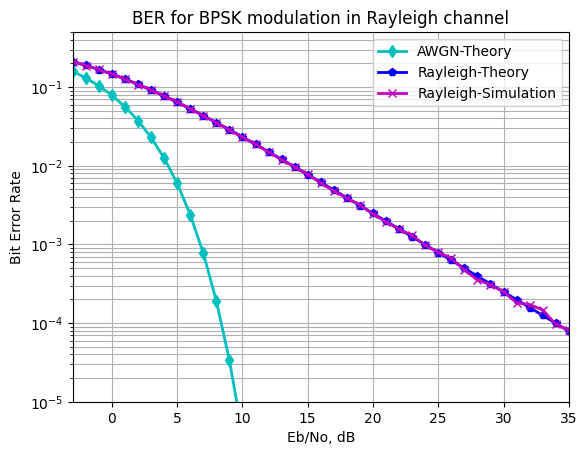

In [5]:
import numpy as np 
from scipy.special import erfc
import matplotlib.pyplot as plt

N = int(1e6)
Eb_N0_dB = np.arange(-3, 60)

ip = np.random.rand(N) > 0.5
s = 2 * ip - 1

nErr = np.zeros(len(Eb_N0_dB))
for i, Eb_N0 in enumerate(Eb_N0_dB):
    n = np.sqrt(0.5) * (np.random.randn(N) + 1j * np.random.randn(N))
    h = np.sqrt(0.5) * (np.random.randn(N) + 1j * np.random.randn(N))
    y = h * s + np.sqrt(10 ** (-Eb_N0 / 10)) * n
    ipHat = (np.real(y / h) > 0).astype(int)
    nErr[i] = np.sum(ip != ipHat)

# BER Calculation
simBer = nErr / N
theoryBerAWGN = 0.5 * erfc(np.sqrt(10 ** (Eb_N0_dB / 10)))
theoryBer = 0.5 * (1 - np.sqrt(10 ** (Eb_N0_dB / 10) / (1 + 10 ** (Eb_N0_dB / 10))))

# Plot
plt.semilogy(Eb_N0_dB, theoryBerAWGN, 'cd-', linewidth=2)
plt.semilogy(Eb_N0_dB, theoryBer, 'bp-', linewidth=2)
plt.semilogy(Eb_N0_dB, simBer, 'mx-', linewidth=2)
plt.axis([-3, 35, 1e-5, 0.5])
plt.grid(True, which="both")
plt.legend(['AWGN-Theory', 'Rayleigh-Theory', 'Rayleigh-Simulation'])
plt.xlabel('Eb/No, dB')
plt.ylabel('Bit Error Rate')
plt.title('BER for BPSK modulation in Rayleigh channel')
plt.show()
